In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class AgentState(TypedDict):
   number1:int
   operation:str
   number2:int 
   finalNumber:int

In [ ]:
def adder(state:AgentState) ->AgentState:
   """This node adds the 2 numbers"""
   state["finalNumber"]=state["number1"]+state["number2"]
   return state

def subtractor(state:AgentState) -> AgentState:
   """This node subtract the 2 numbers"""
   state["finalNumber"]=state["number1"]-state["number2"]
   return state

def decide_next_node(state:AgentState) -> AgentState:
   """This node will select the next node of the graph """

   if state["operation"]=="+":
      return "addition_operation"
   
   elif state["operation"]=="-":
      return "subtraction_operation"
      
   
  

In [7]:
graph=StateGraph(AgentState)

graph.add_node("Add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state) # passthrough function

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation":"Add_node",
        "subtraction_operation":"subtract_node"
    }

)

graph.add_edge("Add_node",END)
graph.add_edge("subtract_node",END)

app=graph.compile()

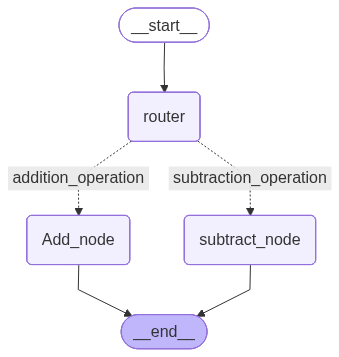

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
initial_state_1=AgentState(number1=10,operation="-",number2=4,finalNumber=0)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 4, 'finalNumber': 6}


In [11]:
initial_state_2=AgentState(number1=10,operation="+",number2=4,finalNumber=0)
print(app.invoke(initial_state_2))

{'number1': 10, 'operation': '+', 'number2': 4, 'finalNumber': 14}
